In [1]:
from selenium import webdriver
import time
import numpy as np
import pandas as pd
import os
import re

In [2]:
from selenium.webdriver.support.ui import WebDriverWait

In [101]:
driver = webdriver.Chrome(executable_path='C:/Users/LKY/chromedriver_win32/chromedriver.exe')

In [102]:
driver.get("https://seekingalpha.com/symbol/PFE/news?filter=&from=2017-09-01T03%3A00%3A00.000Z&to=2020-10-01T03%3A00%3A00.000Z")

In [103]:
x = driver.find_element_by_css_selector('[data-test-id="post-list"]').text

In [104]:
# 스크롤링 없이 첫 화면 스크래핑 예시
x

"First rolling review of COVID-19 vaccine data underway in Europe\nSA NewsThu, Oct. 0176 Comments\nPfizer gene therapy Fast Track'd for Duchenne muscular dystrophy\nSA NewsThu, Oct. 014 Comments\nPfizer inks deal with CStone for oncology assets in China; acquires 9.9% stake\nSA NewsTue, Sep. 294 Comments\nLonza confident on production of Moderna COVID-19 vaccine\nSA NewsTue, Sep. 2923 Comments\nFDA approves Pfizer's Xeljanz for polyarticular course juvenile idiopathic arthritis\nSA NewsMon, Sep. 2810 Comments\nSosei Heptares earns new $5M milestone payment from Pfizer\nSA NewsMon, Sep. 28\nFDA issues final rule for importation of drugs from abroad\nSA NewsFri, Sep. 25101 Comments\nVaccine news roundup - Cuomo sets up panel for separate NY review\nSA NewsFri, Sep. 25219 Comments\nAll six COVID-19 vaccines in industrial manufacturing - HHS Secretary Azar\nSA NewsThu, Sep. 24242 Comments\nPfizer declares $0.38 dividend\nSA NewsThu, Sep. 2419 Comments\nIdeaya and Pfizer to test doublet the

In [105]:
with open('term u.txt','w',encoding="utf-8") as f:
    f.write(x )

In [106]:
# 스크롤을 자동으로 진행하며 끝에서 현재길이와 스크롤의 길이 변화가 더이상 없을경우 스크롤링을 stop 한다.
SCROLL_PAUSE_TIME = 10


last_height = driver.execute_script("return document.body.scrollHeight")

while True:

    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    time.sleep(SCROLL_PAUSE_TIME)
    driver.execute_script("window.scrollTo(0, -document.body.scrollHeight);")
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [107]:
from bs4 import BeautifulSoup

In [108]:
html = driver.page_source

In [109]:
soup = BeautifulSoup(html,'lxml')

<html lang="en" prefix="og:http://ogp.me/ns#" style="--headerHeight:90px;"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<script async="" src="https://websdk.appsflyer.com?st=banners&amp;"></script><script async="" src="https://sb.scorecardresearch.com/c2/33317597/cs.js" type="text/javascript"></script><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-MSK9R8B&amp;l=dataLayer" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-PFXR76F"></script><script async="" src="https://diffuser-cdn.app-us1.com/diffuser/diffuser.js"></script><script async="" src="/xgCxM9By/init.js"></script><meta charset
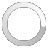

In [110]:
soup

In [111]:
soup.select('a ')

[<a aria-hidden="true" href="/symbol/PFE/news?_pxhc=1606745295814" rel="nofollow" style="width: 0px; height: 0px; font-size: 0px; line-height: 0;" tabindex="-1" target="_blank"></a>,
 <a class="_be0f4-MbAi4 _be0f4-1r2ug _be0f4-3ZKoL" data-test-id="logo" href="/?source=content_type:react|source:site_navigation" title="Home"><span class="_be0f4-MbAi4 _be0f4-Uky_t _be0f4-2iCdH"><svg class="_be0f4-3k61p _be0f4-imNAs"><use xlink:href="#logo"></use></svg></span></a>,
 <a class="_be0f4-MbAi4 _be0f4-130Vb _be0f4-3V-rt" data-test-id="search-button" href="/search" title="Search"><svg class="_be0f4-1XPAg"><use xlink:href="#search"></use></svg></a>,
 <a class="_be0f4-MbAi4 _be0f4-130Vb _be0f4-10dOf" data-test-id="trending" href="/?source=content_type:react|source:headtabs">Trending</a>,
 <a class="_be0f4-MbAi4 _be0f4-130Vb _be0f4-10dOf" data-test-id="my-portfolio" href="/account/portfolio?source=content_type:react|source:headtabs">My Portfolio</a>,
 <a class="_be0f4-MbAi4 _be0f4-130Vb _be0f4-10dOf

In [112]:
result = []
for i in range(0,len(soup.select('a[aria-label]'))):
    print(i)
    k = str(soup.select('a[aria-label]')[i])
    start = k.find('=') + 2
    end = k.find(' class=') -1
    result.append(k[start:end])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [113]:
# result에서도 쓸데 없는것 지우기
result = list(filter(('Premium').__ne__, result))
result = list(filter(('Marketplace').__ne__, result))
result = list(filter(('PRO').__ne__, result))
result

['First rolling review of COVID-19 vaccine data underway in Europe',
 "Pfizer gene therapy Fast Track'd for Duchenne muscular dystrophy",
 'Pfizer inks deal with CStone for oncology assets in China; acquires 9.9% stake',
 'Lonza confident on production of Moderna COVID-19 vaccine',
 "FDA approves Pfizer's Xeljanz for polyarticular course juvenile idiopathic arthritis",
 'Sosei Heptares earns new $5M milestone payment from Pfizer',
 'FDA issues final rule for importation of drugs from abroad',
 'Vaccine news roundup - Cuomo sets up panel for separate NY review',
 'All six COVID-19 vaccines in industrial manufacturing - HHS Secretary Azar',
 'Pfizer declares $0.38 dividend',
 'Ideaya and Pfizer to test doublet therapy in certain solid tumors',
 'White House may overrule tightening of FDA vaccine rules',
 'U.K. to host first human challenge studies for COVID-19 vaccines',
 'FDA accepts Pfizer application for expanded use of Xalkori',
 'Pfizer inks deal with Vivet Therapeutics in liver dis

In [114]:
date=soup.find_all('span')

date_list=[]
for i in date:
    d=i.get_text()
    date_list.append(d)

In [115]:
def find_index(data, target):
    res = []
    lis = data
    while True:
        try:
            res.append(lis.index(target) + (res[-1]+1 if len(res)!=0 else 0)) #+1의 이유 : 0부터 시작이니까
            lis = data[res[-1]+1:]
        except:
            break     
    return res

In [116]:
# 빈 문자열 제거
date_list = [v for v in date_list if v]

#'Show Summaries' 위치 찾아서 그 앞 자르기
date_list = date_list[int(find_index(date_list, 'Show Summaries')[0])+1:]

# SA News 지우기
date_list = list(filter(('SA News').__ne__, date_list))

# Desktop Version 지우기
date_list = list(filter(('Desktop Version').__ne__, date_list))

In [117]:
date_list

['Thu, Oct. 01',
 'Thu, Oct. 01',
 'Tue, Sep. 29',
 'Tue, Sep. 29',
 'Mon, Sep. 28',
 'Mon, Sep. 28',
 'Fri, Sep. 25',
 'Fri, Sep. 25',
 'Thu, Sep. 24',
 'Thu, Sep. 24',
 'Thu, Sep. 24',
 'Thu, Sep. 24',
 'Wed, Sep. 23',
 'Wed, Sep. 23',
 'Wed, Sep. 23',
 'Tue, Sep. 22',
 'Tue, Sep. 22',
 'Mon, Sep. 21',
 'Sat, Sep. 19',
 'Fri, Sep. 18',
 'Fri, Sep. 18',
 'Fri, Sep. 18',
 'Thu, Sep. 17',
 'Tue, Sep. 15',
 'Tue, Sep. 15',
 'Tue, Sep. 15',
 'Mon, Sep. 14',
 'Mon, Sep. 14',
 'Sun, Sep. 13',
 'Sat, Sep. 12',
 'Fri, Sep. 11',
 'Fri, Sep. 11',
 'Wed, Sep. 09',
 'Wed, Sep. 09',
 'Wed, Sep. 09',
 'Wed, Sep. 09',
 'Tue, Sep. 08',
 'Tue, Sep. 08',
 'Tue, Sep. 08',
 'Mon, Sep. 07',
 'Fri, Sep. 04',
 'Thu, Sep. 03',
 'Thu, Sep. 03',
 'Thu, Sep. 03',
 'Thu, Sep. 03',
 'Wed, Sep. 02',
 'Wed, Sep. 02',
 'Tue, Sep. 01',
 'Tue, Sep. 01',
 'Mon, Aug. 31',
 'Thu, Aug. 27',
 'Wed, Aug. 26',
 'Wed, Aug. 26',
 'Tue, Aug. 25',
 'Tue, Aug. 25',
 'Tue, Aug. 25',
 'Mon, Aug. 24',
 'Mon, Aug. 24',
 'Sat, Aug. 22

In [118]:
len(date_list)

746

In [119]:
len(result)

746

In [120]:
pd.DataFrame({'date':date_list, 'title' : result})

,date,title
0,"Thu, Oct. 01",First rolling review of COVID-19 vaccine data ...
1,"Thu, Oct. 01",Pfizer gene therapy Fast Track'd for Duchenne ...
2,"Tue, Sep. 29",Pfizer inks deal with CStone for oncology asse...
3,"Tue, Sep. 29",Lonza confident on production of Moderna COVID...
4,"Mon, Sep. 28",FDA approves Pfizer's Xeljanz for polyarticula...
...,...,...
741,"Tue, Sep. 19, 2017",Ad Com vote split on Pfizer's Sutent for certa...
742,"Fri, Sep. 15, 2017",Ad Comm approaches for expanded use for Pfizer...
743,"Thu, Sep. 14, 2017",Xtandi/ADT combo extends survival in late-stag...
744,"Tue, Sep. 05, 2017",Mallinckrodt targeted by Missouri AG over opio...


In [121]:
for i in range(0,len(date_list)):
    try:
        month = date_list[i][5:int(find_index(date_list[i],'.')[0])]
    except:
        month = 'May'
    if (month == 'Jan'):
        date_list[i] = '01'
    elif (month == 'Feb'):
        date_list[i] = '02'
    elif (month == 'Mar'):
        date_list[i] = '03'
    elif (month == 'Apr'):
        date_list[i] = '04'
    elif (month == 'May'):
        date_list[i] = '05'  
    elif (month == 'Jun'):
        date_list[i] = '06'
    elif (month == 'Jul'):
        date_list[i] = '07'
    elif (month == 'Aug'):
        date_list[i] = '08'
    elif (month == 'Sep'):
        date_list[i] = '09'
    elif (month == 'Oct'):
        date_list[i] = '10'
    elif (month == 'Nov'):
        date_list[i] = '11'
    elif (month == 'Dec'):
        date_list[i] = '12'

In [122]:
date_list

['10',
 '10',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '09',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '08',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',

In [123]:
SA = pd.DataFrame({'date':date_list, 'title' : result})

In [124]:
SA.to_csv("C:/Users/LKY/Desktop/seeking alpha/seeking_alpha_PFE.csv")